CONCLUSION:
The stimulation frequency observed is different than the stimulation frequency programmed, in both the EEG recording and Percept recording. The peak is at the same frequency when comparing EEG and Percept, which means that the difference doesn't come from the way the signal is sampled, but from the stimulation itself. The observed frequency is always the same for one specific desired frequency, i.e.:
    - 85Hz --> observed at 83.3Hz, sometimes associated with a peak at 43.8Hz
    - 110Hz --> observed at 111.1Hz
    - 145Hz --> can only be checked in the EEG (because of Percept's Nyquist) --> observed at 143Hz in EEG
    - 180Hz --> can only be checked in the EEG (because of Percept's Nyquist) --> observed at 182Hz in EEG

In [1]:
from functions.tmsi_poly5reader import Poly5Reader
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [14]:
file = "stimBlockFreqs55_85_110_125_145_165_180-20241211T094849.DATA.Poly5"
filepath = "C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\DATA\\erna_test_JV"
file_name = os.path.join(filepath, file)

In [15]:
TMSi_data = Poly5Reader(file_name)
toMNE = True
raw = TMSi_data.read_data_MNE()

Reading file  C:\Users\Juliette\OneDrive - Charité - Universitätsmedizin Berlin\DATA\erna_test_JV\stimBlockFreqs55_85_110_125_145_165_180-20241211T094849.DATA.Poly5
	 Number of samples:  3608005 
	 Number of channels:  25 
	 Sample rate: 4000 Hz
Done reading data.


c:\Users\Juliette\Research\Projects\analysis_mSST\scripts\functions\tmsi_poly5reader.py:97: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Y', 'Z'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


Creating RawArray with float64 data, n_channels=25, n_times=3608005
    Range : 0 ... 3608004 =      0.000 ...   902.001 secs
Ready.


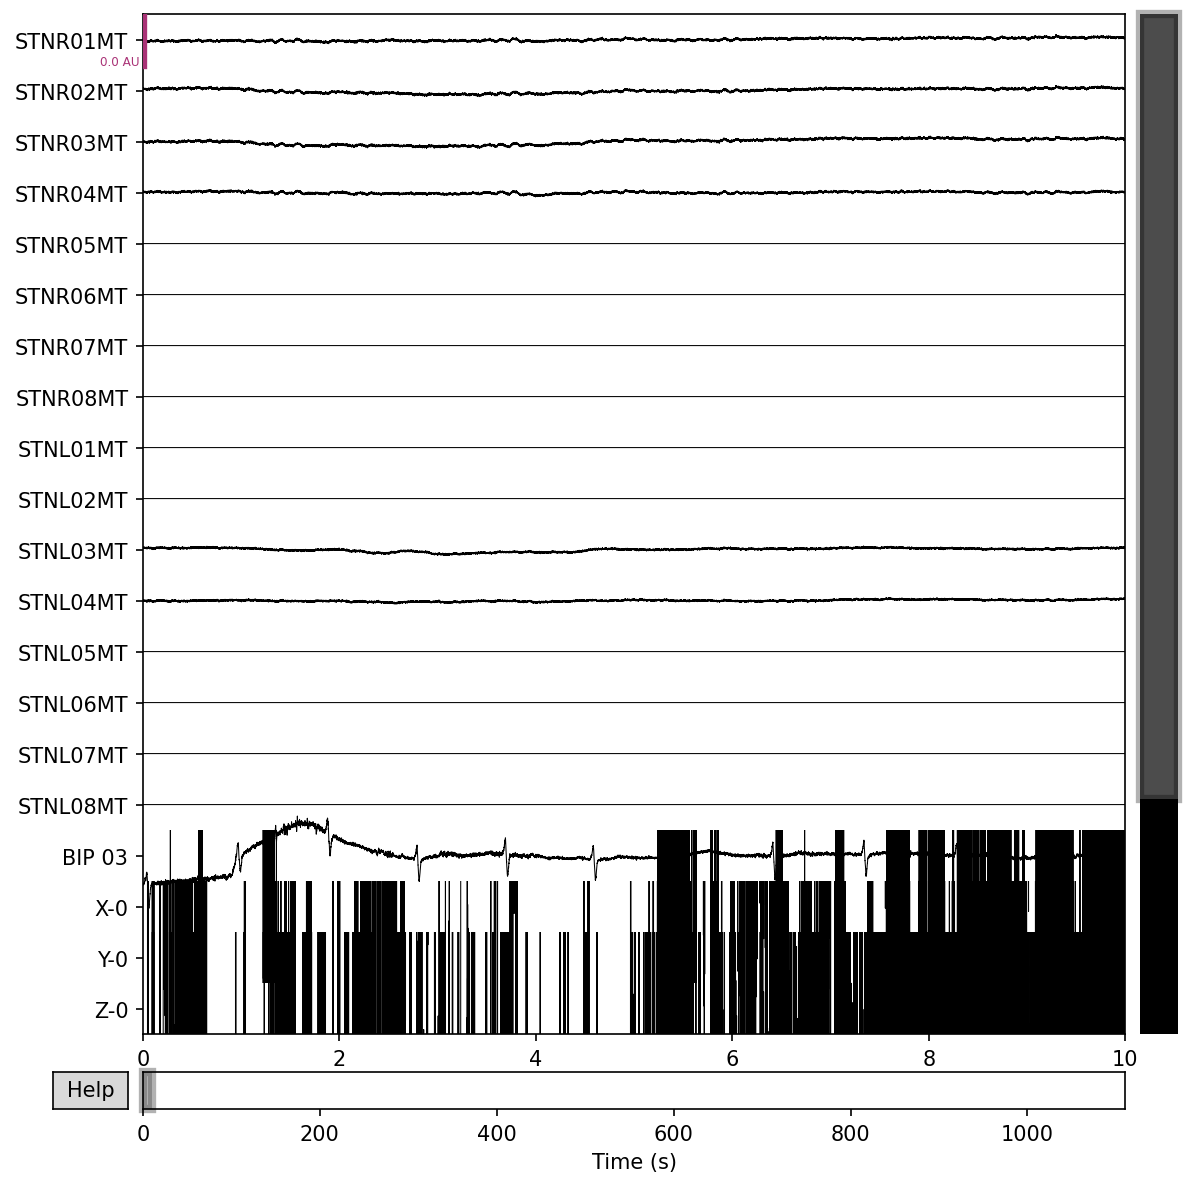

In [9]:
%matplotlib qt
raw.plot()

In [18]:
raw.ch_names

['STNR01MT',
 'STNR02MT',
 'STNR03MT',
 'STNR04MT',
 'STNR05MT',
 'STNR06MT',
 'STNR07MT',
 'STNR08MT',
 'STNL01MT',
 'STNL02MT',
 'STNL03MT',
 'STNL04MT',
 'STNL05MT',
 'STNL06MT',
 'STNL07MT',
 'STNL08MT',
 'BIP 03',
 'X-0',
 'Y-0',
 'Z-0',
 'X-1',
 'Y-1',
 'Z-1',
 'STATUS',
 'Counter 2power24']

In [19]:
raw.drop_channels(['X-1', 'Y-1', 'Z-1', 'X-0', 'Y-0', 'Z-0', 'STNL08MT', 'STNL07MT', 'STATUS', 'Counter 2power24', 'BIP 03'])


<RawArray | 14 x 3608005 (902.0 s), ~385.4 MB, data loaded>

In [20]:
raw.drop_channels(['STNL05MT', 'STNL02MT', 'STNL01MT', 'STNR08MT', 'STNR07MT', 'STNR06MT', 'STNR05MT']) # 'STNL05MT', 'STNL02MT', 'STNL01MT', 'STNR08MT', 'STNR07MT', 'STNR06MT', 'STNR05MT'

<RawArray | 7 x 3608005 (902.0 s), ~192.7 MB, data loaded>

In [32]:
raw.drop_channels(['STNL06MT'])

<RawArray | 4 x 3608005 (902.0 s), ~110.1 MB, data loaded>

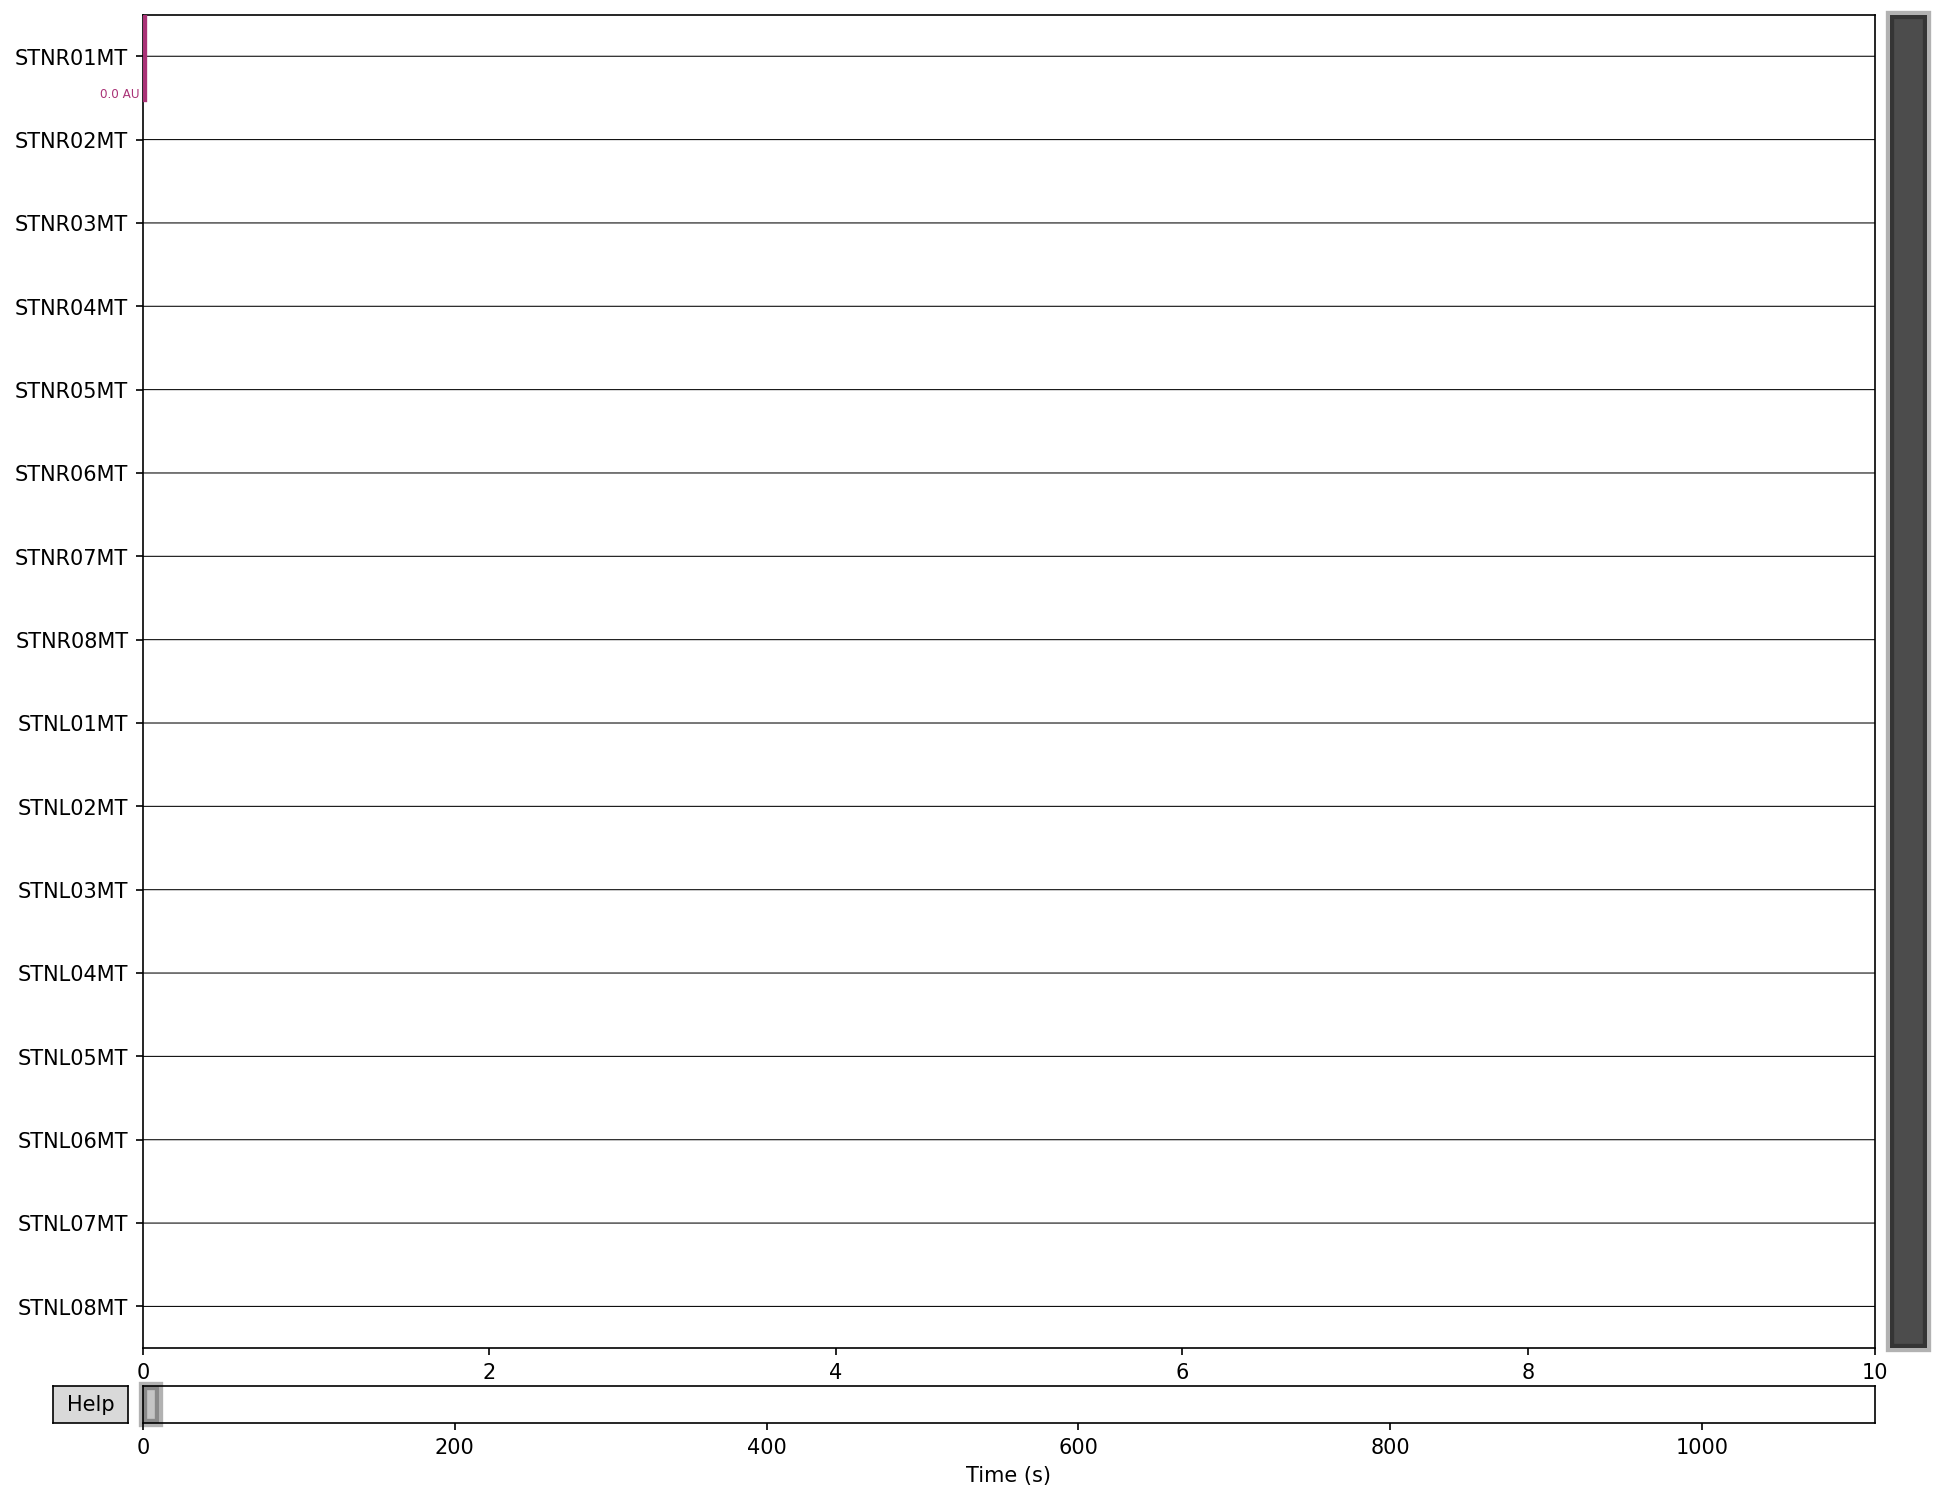

Channels marked as bad:
none


In [12]:
raw.plot()

In [26]:
%matplotlib qt
L_chan = raw.get_data(picks=raw.ch_names[0])[0]
R_chan = raw.get_data(picks=raw.ch_names[1])[0]

f_left, t_left, Zxx_left = scipy.signal.stft(
    L_chan, raw.info['sfreq'], nperseg=int(raw.info['sfreq']), noverlap = (int(raw.info['sfreq'])/2), nfft=int(raw.info['sfreq'])
    )
f_right, t_right, Zxx_right = scipy.signal.stft(
    R_chan, raw.info['sfreq'], nperseg=int(raw.info['sfreq']), noverlap = (int(raw.info['sfreq'])/2), nfft=int(raw.info['sfreq'])
    )
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(np.log(np.abs(Zxx_left)), aspect='auto', origin='lower', 
                #vmin=vmin, vmax= vmax, 
                extent=[t_left[0], t_left[-1], 
                                                f_left[0], f_left[-1]])
#axs[0].set_ylim(0,100)
axs[0].set_title(f'STFT {raw.ch_names[0]}')
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [sec]')
axs[1].imshow(np.log(np.abs(Zxx_right)), aspect='auto', origin='lower', 
                #vmin = vmin, vmax= vmax, 
                extent=[t_right[0], t_right[-1], 
                                                f_right[0], f_right[-1]])
#axs[1].set_ylim(0,100)
axs[1].set_title(f'STFT {raw.ch_names[1]}')
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [sec]')
# add the colorbar
axs[1].figure.colorbar(axs[1].images[0], ax=axs[1], orientation='vertical')
plt.tight_layout()
#figtitle = f'STFT - {session_ID}.png'
#plt.savefig(join(saving_path, figtitle), transparent=False)

C:\Users\Juliette\AppData\Local\Temp\ipykernel_27448\2976400919.py:12: RuntimeWarning: divide by zero encountered in log
  axs[0].imshow(np.log(np.abs(Zxx_left)), aspect='auto', origin='lower',
C:\Users\Juliette\AppData\Local\Temp\ipykernel_27448\2976400919.py:20: RuntimeWarning: divide by zero encountered in log
  axs[1].imshow(np.log(np.abs(Zxx_right)), aspect='auto', origin='lower',


In [33]:
# hertz_165 = raw.copy().crop(65, 225)
# hertz_110 = raw.copy().crop(275, 440)
# hertz_85 = raw.copy().crop(485, 660)
# hertz_145 = raw.copy().crop(700, 880)
# hertz_125 = raw.copy().crop(915, 1100)
hertz_180 = raw.copy().crop(780, 850)


Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_27448\1567971238.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 180 Hz stimulation')
c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Text(0.5, 0.98, 'PSD - 180 Hz stimulation')

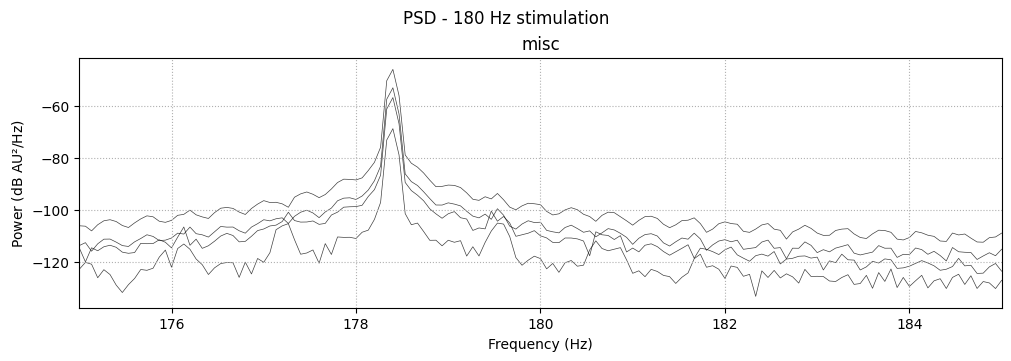

In [35]:
ch_names = hertz_180.ch_names
sf = hertz_180.info['sfreq']
%matplotlib inline
### Plot PSD of signal (averaging all channels)
psd_raw_avg = hertz_180.compute_psd(method="welch", picks=ch_names, fmin=175, fmax=185, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)/2), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 180 Hz stimulation')


In [19]:
hertz_165

<RawArray | 16 x 640001 (160.0 s), ~78.1 MB, data loaded>

In [122]:
ch_names = hertz_165.info['ch_names']
sf = hertz_165.info['sfreq']

Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_13632\462036192.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 165 Hz stimulation')
c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Text(0.5, 0.98, 'PSD - 165 Hz stimulation')

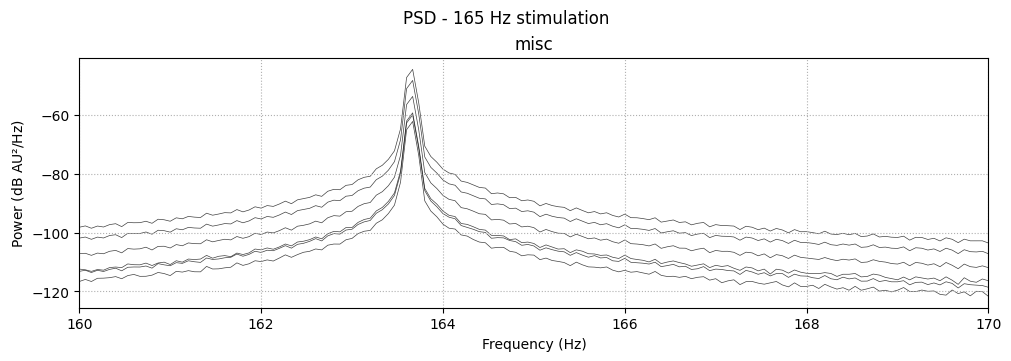

In [138]:
%matplotlib inline
### Plot PSD of signal (averaging all channels)
psd_raw_avg = hertz_165.compute_psd(method="welch", picks=ch_names, fmin=160, fmax=170, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)/2), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 165 Hz stimulation')



Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_13632\3032399628.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 110 Hz stimulation')
c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Text(0.5, 0.98, 'PSD - 110 Hz stimulation')

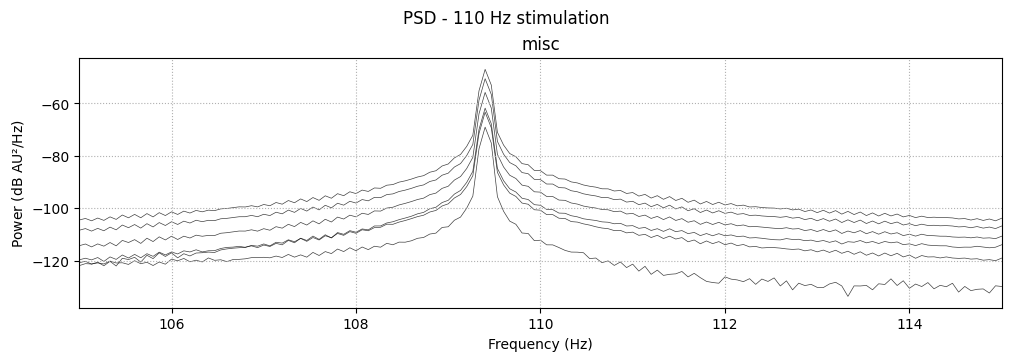

In [139]:
### Plot PSD of signal (averaging all channels)
psd_raw_avg = hertz_110.compute_psd(method="welch", picks=ch_names, fmin=105, fmax=115, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)/2), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 110 Hz stimulation')

Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_13632\323032485.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 85 Hz stimulation')
c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Text(0.5, 0.98, 'PSD - 85 Hz stimulation')

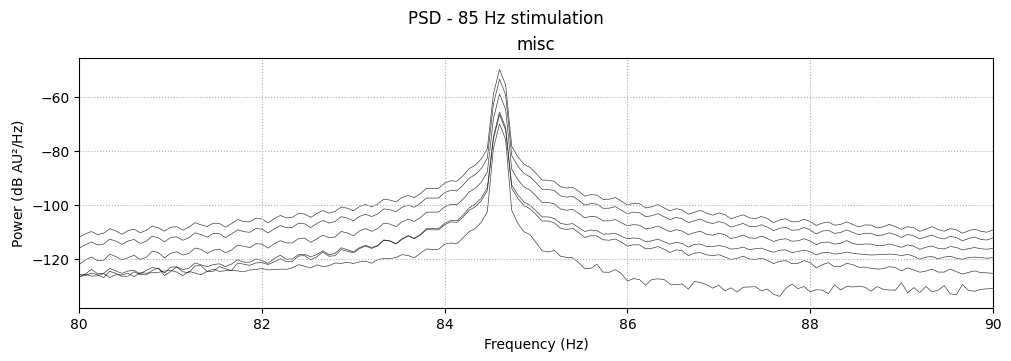

In [148]:
### Plot PSD of signal (averaging all channels)
psd_raw_avg = hertz_85.compute_psd(method="welch", picks=ch_names, fmin=80, fmax=90, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)/2), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 85 Hz stimulation')

Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_13632\2444702784.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 145 Hz stimulation')
c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Text(0.5, 0.98, 'PSD - 145 Hz stimulation')

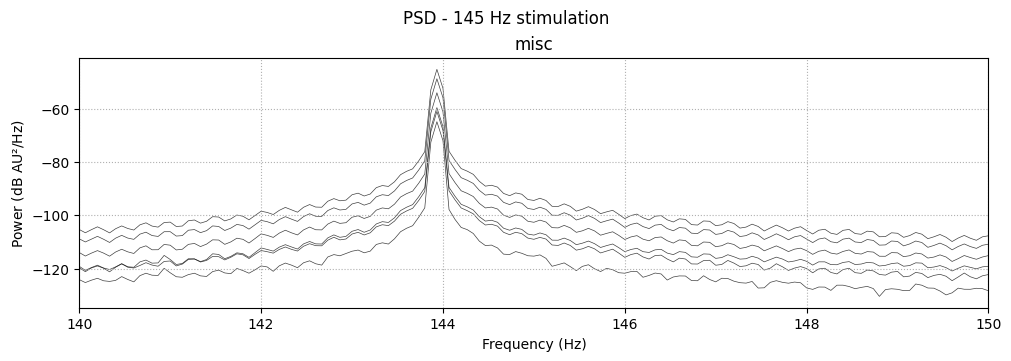

In [146]:
### Plot PSD of signal (averaging all channels)
psd_raw_avg = hertz_145.compute_psd(method="welch", picks=ch_names, fmin=140, fmax=150, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)/2), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 145 Hz stimulation')

Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_13632\369746808.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 125 Hz stimulation')
c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Text(0.5, 0.98, 'PSD - 125 Hz stimulation')

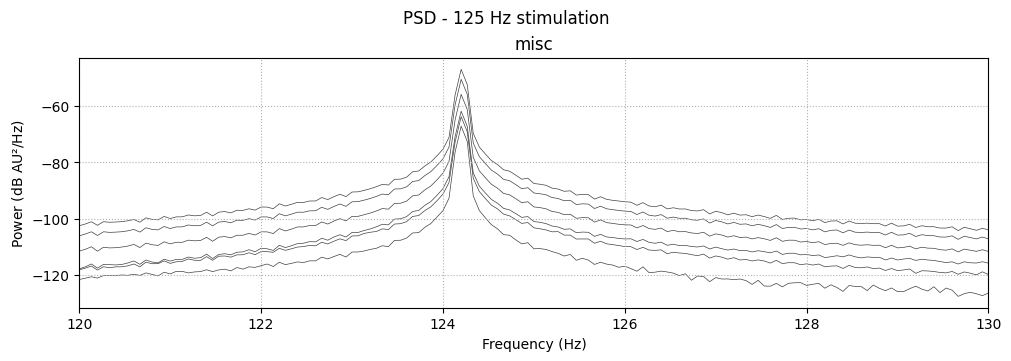

In [144]:
### Plot PSD of signal (averaging all channels)
psd_raw_avg = hertz_125.compute_psd(method="welch", picks=ch_names, fmin=120, fmax=130, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD - 125 Hz stimulation')

In [167]:
def simulate_artifact_train(freq=125.0, pw=60e-6, tau=0.5e-3,
                            fs=250.0, hr_fs=1e6, duration=0.1):
    """
    Generates:
      - high-res time vector (t_hr) and artifact waveform,
      - sampling points at fs with sampled values.
    The artifact: a rectangular pulse for pw, then a negative exponential recovery with time constant tau.
    """
    t_hr = np.arange(0, duration, 1/hr_fs)
    stim = np.zeros_like(t_hr)
    period = 1.0 / freq

    for k in range(int(np.floor(duration / period))):
        t0 = k * period
        # rectangular pulse
        idx_pulse = (t_hr >= t0) & (t_hr < t0 + pw)
        stim[idx_pulse] = 1.0
        # exponential recovery starting immediately after pulse
        idx_decay = t_hr >= (t0 + pw)
        stim[idx_decay] += -np.exp(-(t_hr[idx_decay] - (t0 + pw))/tau)

    # sampling points
    #t_samp = np.arange(0, duration, 1/fs)
    t_samp = np.arange(0, duration, 1/fs) - (0.01 / fs)
    #samp_vals = np.interp(t_samp, t_hr, stim)
    samp_vals = np.zeros_like(t_samp)

    return t_hr, stim, t_samp, samp_vals


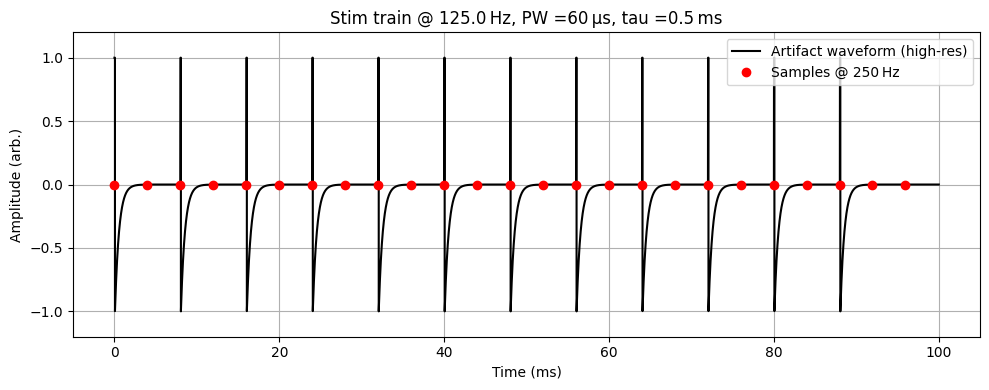

In [168]:
%matplotlib inline
# Parameters
frequency = 125.0      # Hz
pulse_width = 60e-6    # 60 µs
tau = 0.5e-3             # recovery time constant, e.g. 5 ms
sampling_rate = 250.0  # Hz → 4 ms interval
duration = 0.1         # 100 ms total

# simulate
t_hr, stim_hr, t_samp, samp_vals = simulate_artifact_train(
    freq=frequency, pw=pulse_width, tau=tau,
    fs=sampling_rate, hr_fs=1e6, duration=duration
)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t_hr*1e3, stim_hr, '-k', label='Artifact waveform (high‑res)')
plt.plot(t_samp*1e3, samp_vals, 'ro', label='Samples @ 250 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (arb.)')
plt.title(f'Stim train @ {frequency:.1f} Hz, PW ={pulse_width*1e6:.0f} µs, tau ={tau*1e3:.1f} ms')
plt.ylim(-1.2,1.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


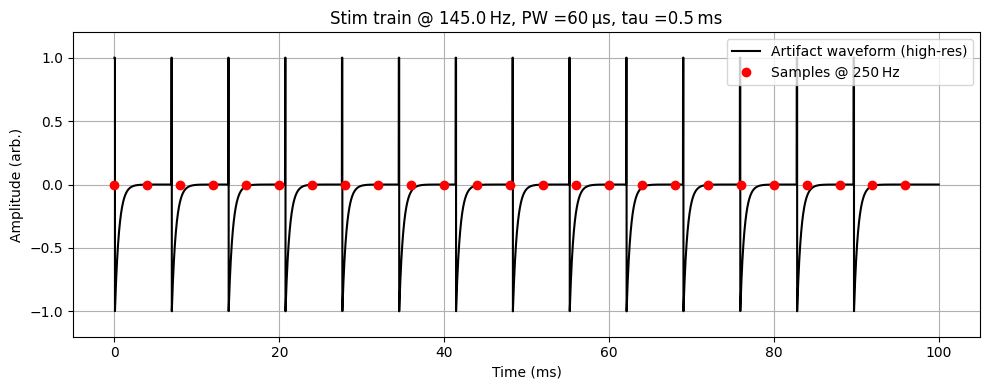

In [169]:
# Parameters
frequency = 145.0      # Hz
pulse_width = 60e-6    # 60 µs
tau = 0.5e-3             # recovery time constant, e.g. 5 ms
sampling_rate = 250.0  # Hz → 4 ms interval
duration = 0.1         # 100 ms total

# simulate
t_hr, stim_hr, t_samp, samp_vals = simulate_artifact_train(
    freq=frequency, pw=pulse_width, tau=tau,
    fs=sampling_rate, hr_fs=1e6, duration=duration
)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t_hr*1e3, stim_hr, '-k', label='Artifact waveform (high‑res)')
plt.plot(t_samp*1e3, samp_vals, 'ro', label='Samples @ 250 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (arb.)')
plt.title(f'Stim train @ {frequency:.1f} Hz, PW ={pulse_width*1e6:.0f} µs, tau ={tau*1e3:.1f} ms')
plt.ylim(-1.2,1.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

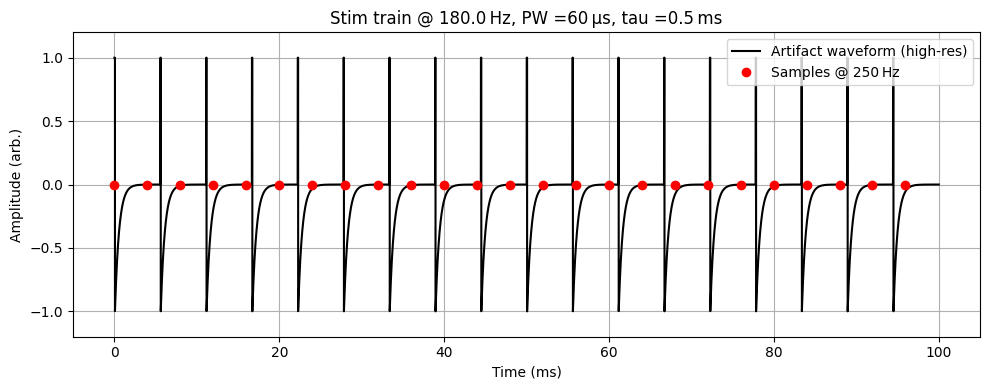

In [170]:
# Parameters
frequency = 180.0      # Hz
pulse_width = 60e-6    # 60 µs
tau = 0.5e-3             # recovery time constant, e.g. 5 ms
sampling_rate = 250.0  # Hz → 4 ms interval
duration = 0.1         # 100 ms total

# simulate
t_hr, stim_hr, t_samp, samp_vals = simulate_artifact_train(
    freq=frequency, pw=pulse_width, tau=tau,
    fs=sampling_rate, hr_fs=1e6, duration=duration
)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t_hr*1e3, stim_hr, '-k', label='Artifact waveform (high‑res)')
plt.plot(t_samp*1e3, samp_vals, 'ro', label='Samples @ 250 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (arb.)')
plt.title(f'Stim train @ {frequency:.1f} Hz, PW ={pulse_width*1e6:.0f} µs, tau ={tau*1e3:.1f} ms')
plt.ylim(-1.2,1.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def simulate_artifact_train(freq=125.0, pw=60e-6, tau=0.5e-3,
                            fs=250.0, hr_fs=1e6, duration=0.1):
    """
    Generates:
      - high-res time vector (t_hr) and artifact waveform,
      - sampling points at fs with sampled values.
    The artifact: a rectangular pulse for pw, then a negative exponential recovery with time constant tau.
    """
    t_hr = np.arange(0, duration, 1/hr_fs)
    stim = np.zeros_like(t_hr)
    period = 1.0 / freq

    for k in range(int(np.floor(duration / period))):
        t0 = k * period
        # rectangular pulse
        idx_pulse = (t_hr >= t0) & (t_hr < t0 + pw)
        stim[idx_pulse] = 1.0
        # exponential recovery starting immediately after pulse
        idx_decay = t_hr >= (t0 + pw)
        stim[idx_decay] += -np.exp(-(t_hr[idx_decay] - (t0 + pw))/tau)

    # sampling points
    #t_samp = np.arange(0, duration, 1/fs)
    t_samp = np.arange(0, duration, 1/fs) - (0.01 / fs)
    #samp_vals = np.interp(t_samp, t_hr, stim)
    samp_vals = np.zeros_like(t_samp)

    return t_hr, stim, t_samp, samp_vals


# Parameters
frequency = 180.0      # Hz
pulse_width = 60e-6    # 60 µs
tau = 0.5e-3             # recovery time constant, e.g. 5 ms
sampling_rate = 250.0  # Hz → 4 ms interval
duration = 0.1         # 100 ms total

# simulate
t_hr, stim_hr, t_samp, samp_vals = simulate_artifact_train(
    freq=frequency, pw=pulse_width, tau=tau,
    fs=sampling_rate, hr_fs=1e6, duration=duration
)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t_hr*1e3, stim_hr, '-k', label='Artifact waveform (high‑res)')
plt.plot(t_samp*1e3, samp_vals, 'ro', label='Samples @ 250 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (arb.)')
plt.title(f'Stim train @ {frequency:.1f} Hz, PW ={pulse_width*1e6:.0f} µs, tau ={tau*1e3:.1f} ms')
plt.ylim(-1.2,1.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

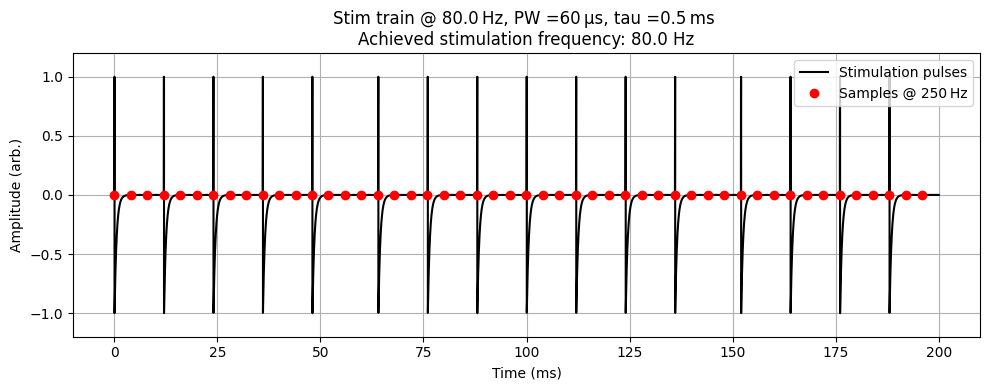

Achieved stimulation frequency: 80.0 Hz


In [94]:
%matplotlib inline
# Parameters
frequency = 80.0      # Hz
pulse_width = 60e-6    # 60 µs
tau = 0.5e-3             # recovery time constant, e.g. 5 ms
sampling_rate = 250.0  # Hz → 4 ms interval
duration = 0.2     # 60 s total

fs = sampling_rate  # 250
Ts = 1/fs
T_stim = 1.0 / frequency

# approximate number of samples between successive pulses
delta_k = []
stim_onsets = []
for k in range(int(duration * frequency) + 5):
    ideal = k * T_stim
    samp_idx = int(np.round(ideal / Ts))
    t0 = samp_idx * Ts + 1e-6  # epsilon small positive offset
    if t0 < duration:
        stim_onsets.append(t0)

# Then in simulate_artifact_train, instead of looping pulses every period,
# use these stim_onsets

def simulate_artifact_train(freq=125.0, pw=60e-6, tau=0.5e-3,
                            fs=250.0, hr_fs=1e6, duration=0.1):
    """
    Generates:
      - high-res time vector (t_hr) and artifact waveform,
      - sampling points at fs with sampled values.
    The artifact: a rectangular pulse for pw, then a negative exponential recovery with time constant tau.
    """
    t_hr = np.arange(0, duration, 1/hr_fs)
    stim = np.zeros_like(t_hr)
    period = 1.0 / freq

    for t0 in stim_onsets:
        idx_pulse = (t_hr >= t0) & (t_hr < t0 + pw)
        stim[idx_pulse] = 1.0
        idx_decay = t_hr >= (t0 + pw)
        stim[idx_decay] += -np.exp(-(t_hr[idx_decay] - (t0 + pw))/tau)

    # sampling points
    #t_samp = np.arange(0, duration, 1/fs)
    t_samp = np.arange(0, duration, 1/fs) - (0.01 / fs)
    #samp_vals = np.interp(t_samp, t_hr, stim)
    samp_vals = np.zeros_like(t_samp)

    return t_hr, stim, t_samp, samp_vals


# simulate
t_hr, stim_hr, t_samp, samp_vals = simulate_artifact_train(
    freq=frequency, pw=pulse_width, tau=tau,
    fs=sampling_rate, hr_fs=1e6, duration=duration
)

peaks, _ = scipy.signal.find_peaks(stim_hr, height=0.5)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t_hr*1e3, stim_hr, '-k', label='Stimulation pulses')
plt.plot(t_samp*1e3, samp_vals, 'ro', label='Samples @ 250 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (arb.)')
plt.title(f'Stim train @ {frequency:.1f} Hz, PW ={pulse_width*1e6:.0f} µs, tau ={tau*1e3:.1f} ms \nAchieved stimulation frequency: {len(peaks)/duration} Hz')
plt.ylim(-1.2,1.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Achieved stimulation frequency: {len(peaks)/duration} Hz')

Jonathan said: "They oversample at 10kHz during the recording, and then they "pick" samples so that the resulting sampling frequency is 250Hz and the stimulation pulses always fall right after a sample. To do this, they use a delta-sigma convertor".

In [54]:
%matplotlib qt
# Parameters
frequency = 80.0         # Hz
pulse_width = 60e-6      # 60 µs
tau = 0.5e-3             # 0.5 ms decay
fs_target = 250.0        # Final sampling rate (approximate)
hr_fs = 1e6              # High-resolution fs
duration = 0.2           # in seconds

# Generate stimulation onsets (aligned to 4 ms intervals)
T_stim = 1.0 / frequency
stim_onsets = []
for k in range(int(duration * frequency) + 5):
    ideal = k * T_stim
    samp_idx = int(np.round(ideal / (1/fs_target)))
    t0 = samp_idx * (1/fs_target) + 1e-6
    if t0 < duration:
        stim_onsets.append(t0)
stim_onsets = np.array(stim_onsets)

# Simulate artifact train at high resolution
def simulate_artifact_train(stim_onsets, pw, tau, hr_fs, duration):
    t_hr = np.arange(0, duration, 1/hr_fs)
    stim = np.zeros_like(t_hr)
    for t0 in stim_onsets:
        idx_pulse = (t_hr >= t0) & (t_hr < t0 + pw)
        stim[idx_pulse] = 1.0
        idx_decay = t_hr >= (t0 + pw)
        stim[idx_decay] += -np.exp(-(t_hr[idx_decay] - (t0 + pw)) / tau)
    return t_hr, stim

# Simulate "brain signal" + artifact
def simulate_brain_signal(t_hr):
    return 0.3 * np.sin(2 * np.pi * 10 * t_hr)  # e.g., 10 Hz oscillation

# High-resolution time and signals
t_hr, artifact = simulate_artifact_train(stim_onsets, pulse_width, tau, hr_fs, duration)
brain_signal = simulate_brain_signal(t_hr)
raw_signal = brain_signal + artifact

# Downsampling: sample just before each stim pulse (e.g., 50 µs before onset)
sample_times = stim_onsets - 50e-6  # 50 µs before each pulse
sample_times = sample_times[(sample_times >= 0) & (sample_times < duration)]
sample_values = np.interp(sample_times, t_hr, raw_signal)

# Plotting
plt.figure(figsize=(12,4))
plt.plot(t_hr*1e3, raw_signal, 'k', alpha=0.6, label='Raw signal (brain + artifact)')
plt.plot(t_hr*1e3, brain_signal, 'b--', alpha=0.4, label='Underlying brain signal')
plt.plot(sample_times*1e3, sample_values, 'ro', label='Samples (anti-artifact)')
plt.vlines(stim_onsets*1e3, -1.2, 1.2, color='gray', linestyles='dotted', label='Stim pulses')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (arb.)')
plt.title('Percept-like Artifact-Avoiding Sampling')
plt.ylim(-1.2, 1.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Approx. achieved sampling rate: {len(sample_times)/duration:.2f} Hz")


Approx. achieved sampling rate: 75.00 Hz


In [96]:
def simulate_artifact_train(stim_onsets, pw, tau, t_hr):
    stim = np.zeros_like(t_hr)
    for t0 in stim_onsets:
        # Rectangular part
        idx_pulse = (t_hr >= t0) & (t_hr < t0 + pw)
        stim[idx_pulse] = 1.0

        # Exponential decay part (starting immediately after the pulse)
        t_decay = t_hr[(t_hr >= t0 + pw) & (t_hr < t0 + pw + 5 * tau)]
        stim[(t_hr >= t0 + pw) & (t_hr < t0 + pw + 5 * tau)] += -np.exp(-(t_decay - (t0 + pw)) / tau)
    return stim

# Simulate brain signal
def simulate_brain_signal(t_hr):
    return 0.3 * np.sin(2 * np.pi * 10 * t_hr)

# Check if a time point is clean
def is_clean(t, stim_onsets, pw, decay_win):
    for s in stim_onsets:
        if s <= t < (s + pw + decay_win):
            return False
    return True

# Adjust sample times
def clean_sample_times(sample_times, stim_onsets, pw, decay_win, jitter):
    cleaned = []
    for t in sample_times:
        if is_clean(t, stim_onsets, pw, decay_win):
            cleaned.append(t)
        else:
            # Search for a nearby clean time within jitter window
            shift_range = np.linspace(-jitter, jitter, 100)
            found = False
            for dt in shift_range:
                t_new = t + dt
                if 0 <= t_new <= duration and is_clean(t_new, stim_onsets, pw, decay_win):
                    cleaned.append(t_new)
                    found = True
                    break
            if not found:
                # If no clean time found in range, drop sample
                print(f"Dropped sample at {t*1e3:.2f} ms (no clean window nearby)")
    return np.array(cleaned)

In [100]:
# Parameters
%matplotlib qt
frequency = 85.0          # Hz (stimulation)
pulse_width = 60e-6       # 60 µs
tau = 0.4e-3              # decay
decay_window = 2e-3       # 2 ms artifact tail window
fs_target = 250.0         # 250 Hz target
hr_fs = 1e6               # 1 MHz
duration = 2             # seconds
jitter_limit = 1e-3       # max allowed shift (1 ms) if too close to artifact

# Time vectors
T_sample = 1.0 / fs_target
t_hr = np.arange(0, duration, 1/hr_fs)
sample_times = np.arange(0, duration, T_sample)
# Randomize stim onset to avoid always starting at t=0
stim_period = 1 / frequency
stim_phase = np.random.uniform(0, stim_period)  # Or set a fixed value if preferred
stim_onsets = np.arange(stim_phase, duration, stim_period)

# Simulate artifact train
# def simulate_artifact_train(stim_onsets, pw, tau, t_hr):
#     stim = np.zeros_like(t_hr)
#     for t0 in stim_onsets:
#         idx_pulse = (t_hr >= t0) & (t_hr < t0 + pw)
#         stim[idx_pulse] = 1.0
#         idx_decay = t_hr >= (t0 + pw)
#         stim[idx_decay] += -np.exp(-(t_hr[idx_decay] - (t0 + pw)) / tau)
#     return stim


# Generate signals
artifact = simulate_artifact_train(stim_onsets, pulse_width, tau, t_hr)
brain_signal = simulate_brain_signal(t_hr)
raw_signal = brain_signal + artifact

# Adjust sampling points
adjusted_sample_times = clean_sample_times(sample_times, stim_onsets, pulse_width, decay_window, jitter_limit)
sample_values = np.interp(adjusted_sample_times, t_hr, raw_signal)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(t_hr*1e3, raw_signal, 'k', alpha=0.4, label='Raw signal (artifact + brain)')
plt.plot(t_hr*1e3, brain_signal, 'b--', alpha=0.3, label='True brain signal')
plt.plot(adjusted_sample_times*1e3, sample_values, 'ro', label='Clean samples')
for s in stim_onsets:
    plt.axvspan((s)*1e3, (s + pulse_width + decay_window)*1e3, color='gray', alpha=0.2)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title(f'Percept-style sampling (avoiding artifact and recovery tail) - {frequency:.1f} Hz stimulation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Target sampling rate: {fs_target} Hz")
print(f"Actual # of samples: {len(adjusted_sample_times)}")
print(f"Mean sample interval: {np.mean(np.diff(adjusted_sample_times))*1e3:.2f} ms")
print(f"Max jitter from ideal spacing: {np.max(np.abs(np.diff(adjusted_sample_times) - T_sample))*1e3:.2f} ms")
print(f"Achieved sampling rate: {len(adjusted_sample_times)/duration:.2f} Hz")


Target sampling rate: 250.0 Hz
Actual # of samples: 500
Mean sample interval: 4.00 ms
Max jitter from ideal spacing: 1.00 ms
Achieved sampling rate: 250.00 Hz


C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\2565809690.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  el.exec() if hasattr(el, "exec") else el.exec_()


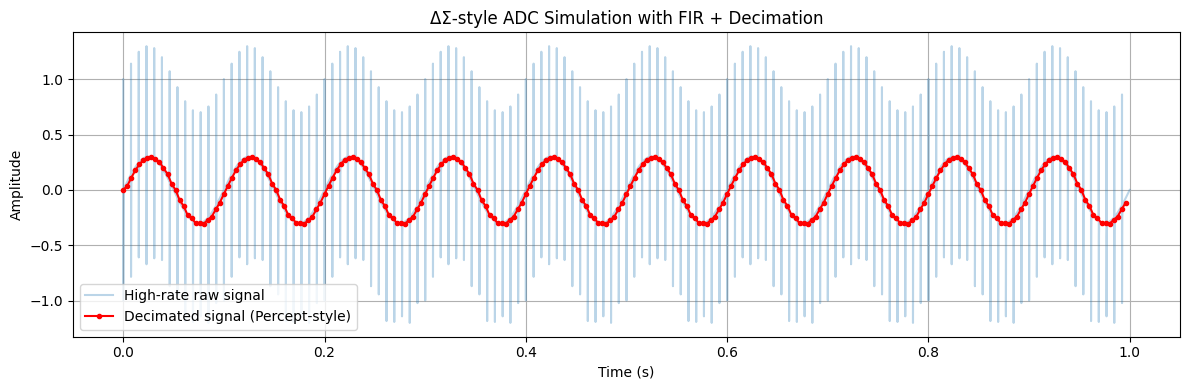

In [50]:
from scipy.signal import firwin, lfilter, decimate
%matplotlib inline

# Step 1: High-rate signal generation (already done)
fs_high = 50_000  # High oversampling rate
t_hr = np.arange(0, duration, 1/fs_high)
stim_onsets = np.arange(stim_phase, duration, 1/frequency)
artifact = simulate_artifact_train(stim_onsets, pulse_width, tau, t_hr)
brain_signal = simulate_brain_signal(t_hr)
raw_signal = brain_signal + artifact

# Step 2: Simulated quantization (optional)
quantized_signal = np.round(raw_signal * 2**16) / 2**16  # 16-bit quantization

# Step 3: FIR LPF before decimation
nyquist_rate = fs_high / 2
cutoff_hz = 125  # Half of target fs to satisfy Nyquist
fir_coeffs = firwin(numtaps=201, cutoff=cutoff_hz, fs=fs_high)
filtered_signal = lfilter(fir_coeffs, 1.0, quantized_signal)

# Step 4: Decimate (select every Nth sample)
decim_factor = int(fs_high // fs_target)
decimated_signal = filtered_signal[::decim_factor]
t_decimated = t_hr[::decim_factor]

# Visualization
plt.figure(figsize=(12, 4))
plt.plot(t_hr, raw_signal, alpha=0.3, label='High-rate raw signal')
plt.plot(t_decimated, decimated_signal, 'r.-', label='Decimated signal (Percept-style)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ΔΣ-style ADC Simulation with FIR + Decimation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


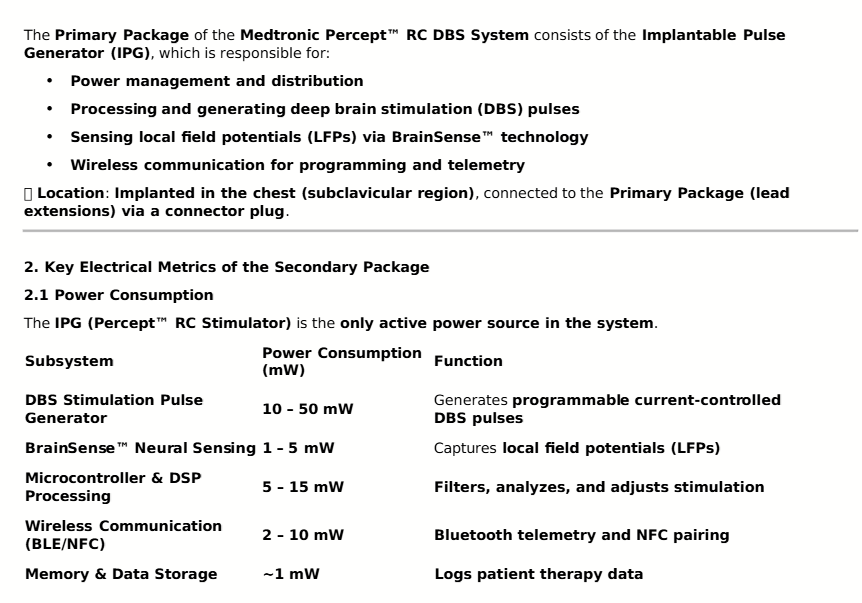

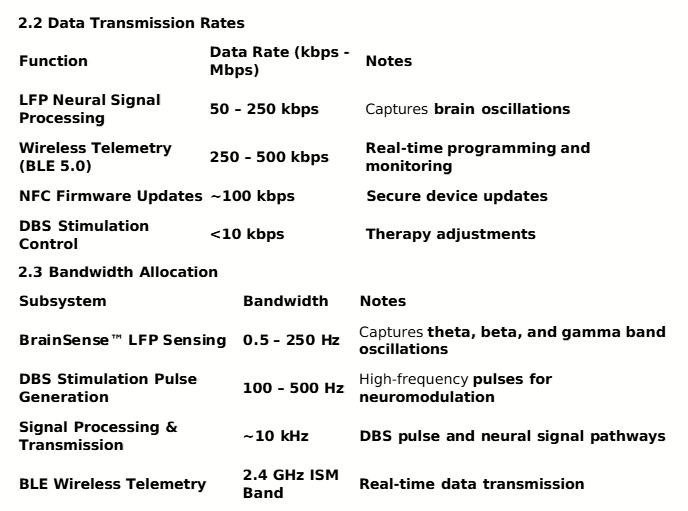

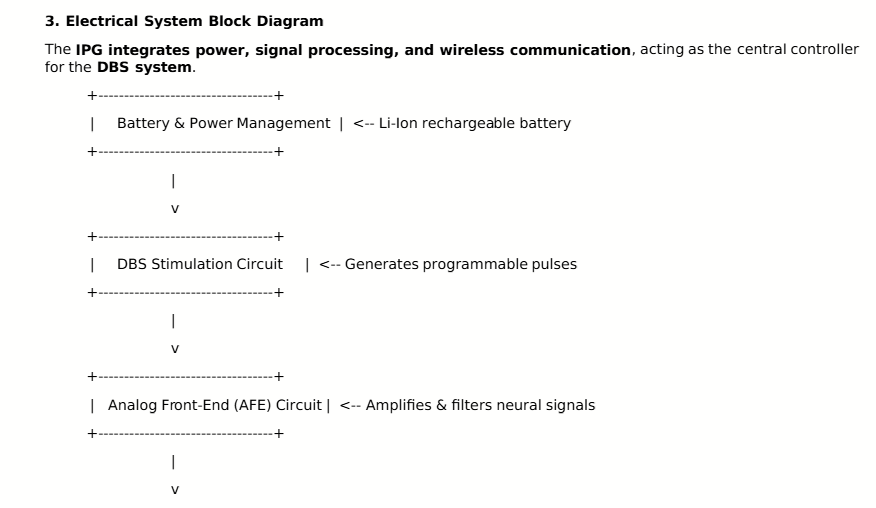

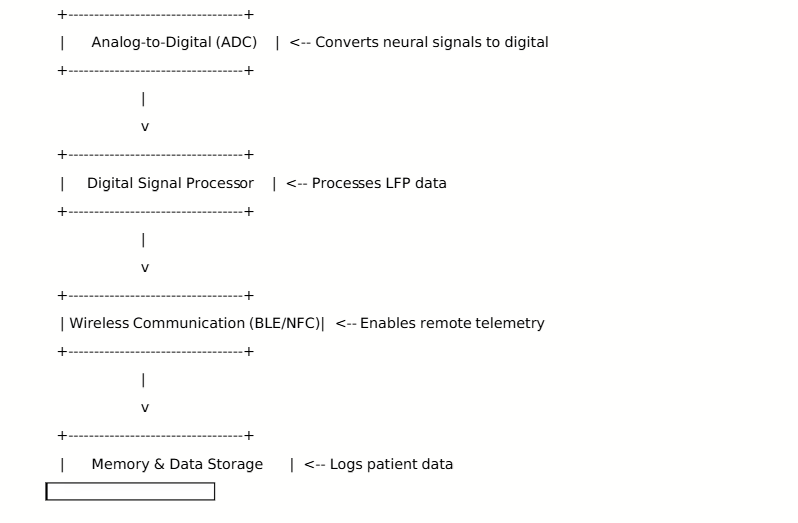

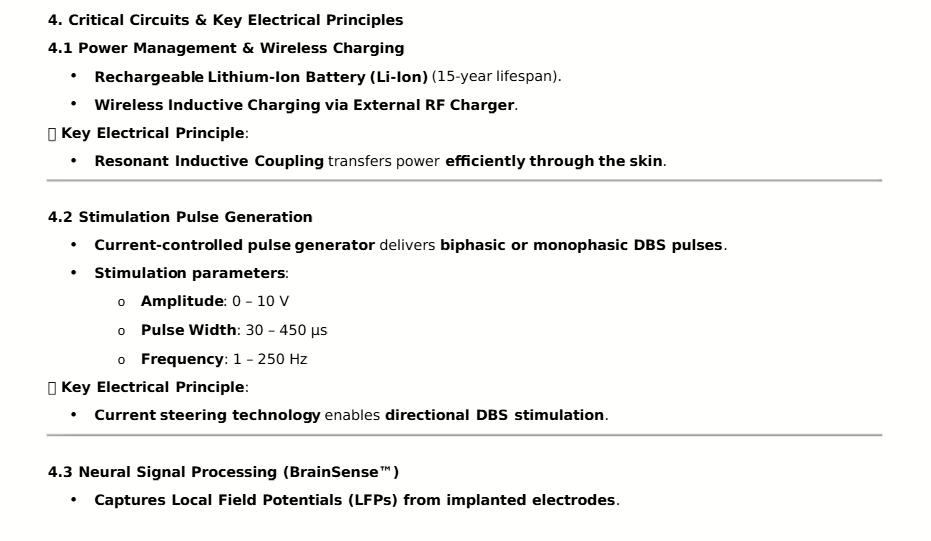

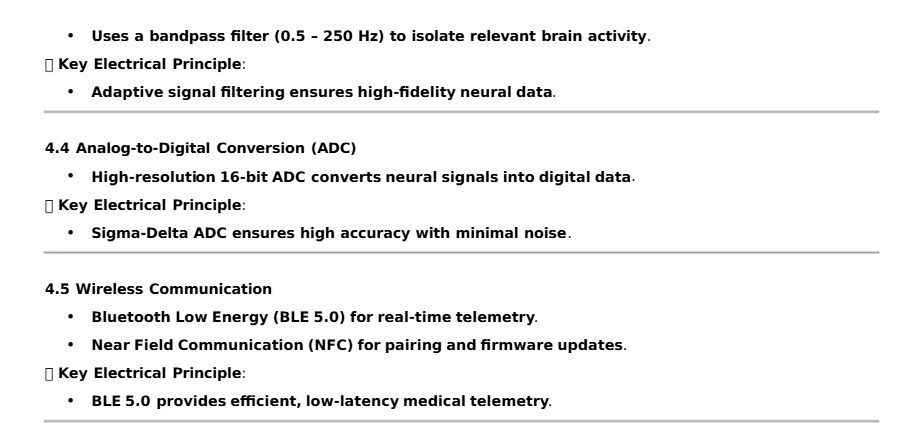

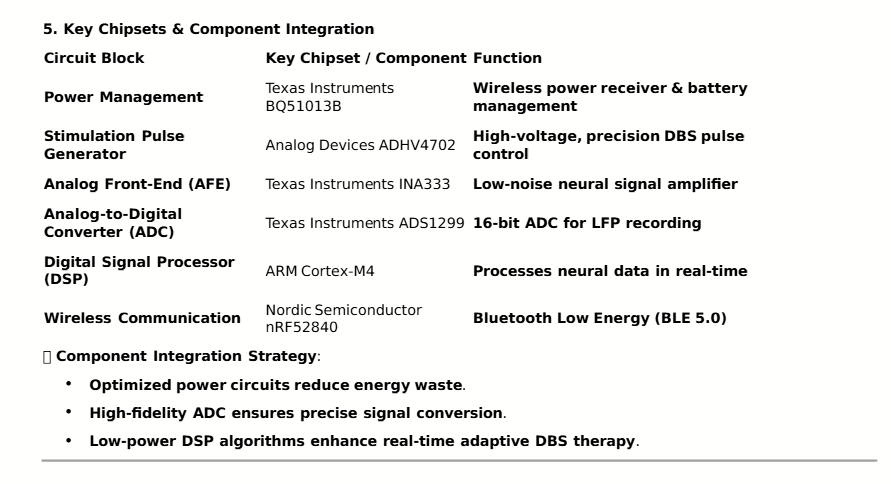

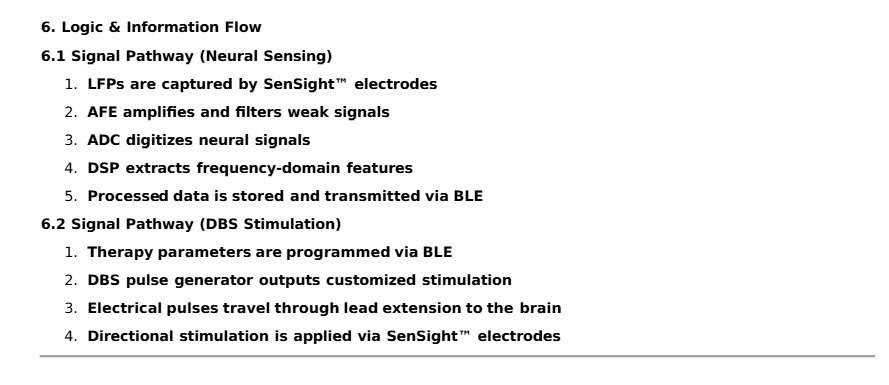

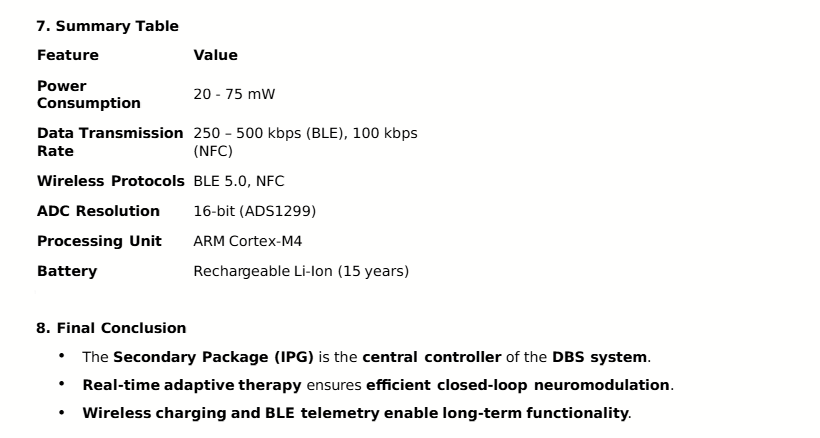

In [40]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# -----------------------------
# PARAMETERS
# -----------------------------
fs_high = 100_000       # High sampling rate (Hz)
fs_low = 250            # Target low sampling rate (Hz)
decimation_factor = fs_high // fs_low
duration = 1.0          # Signal duration in seconds

adc_bits = 16
adc_range = 4.8e-3      # ±4.8 mV => total range = 9.6 mV
adc_full_scale = 2 * adc_range
adc_step = adc_full_scale / (2 ** adc_bits)

# -----------------------------
# SIMULATE INPUT SIGNAL
# -----------------------------
t_high = np.arange(0, duration, 1 / fs_high)
# Example: 40 Hz sine wave + noise
freq = 40
signal_high = 2e-3 * np.sin(2 * np.pi * freq * t_high)  # 2 mV peak sine wave
signal_high += 0.2e-3 * np.random.randn(len(t_high))   # Add small Gaussian noise

# -----------------------------
# QUANTIZATION (simulate ADC)
# -----------------------------
quantized_signal = np.round(signal_high / adc_step) * adc_step
quantized_signal = np.clip(quantized_signal, -adc_range, adc_range - adc_step)

# -----------------------------
# ANTI-ALIASING FILTER (FIR)
# -----------------------------
# Design FIR low-pass filter (cutoff just below Nyquist of low rate)
nyquist_low = fs_low / 2
cutoff_hz = 0.9 * nyquist_low
numtaps = 127  # FIR filter length
fir_coeffs = signal.firwin(numtaps, cutoff=cutoff_hz, fs=fs_high)

# Apply the filter
filtered_signal = signal.lfilter(fir_coeffs, 1.0, quantized_signal)

# -----------------------------
# DECIMATION (FILTERING + DOWNSAMPLING)
# -----------------------------
signal_decimated = filtered_signal[::decimation_factor]
t_low = t_high[::decimation_factor]

# -----------------------------
# PLOT
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(t_high[:2000], quantized_signal[:2000]*1e3, label='Quantized (100 kHz)', alpha=0.6)
plt.plot(t_low[:500], signal_decimated[:500]*1e3, label='Decimated (250 Hz)', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ΔΣ ADC Simulation (Medtronic Percept-like)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# -----------------------------
# PARAMETERS
# -----------------------------
fs_high = 100_000       # High sampling rate (Hz)
fs_low = 250            # Target low sampling rate (Hz)
decimation_factor = fs_high // fs_low
duration = 1.0          # Duration in seconds

adc_bits = 16
adc_range = 4.8e-3      # ±4.8 mV => total range = 9.6 mV
adc_step = (2 * adc_range) / (2 ** adc_bits)

# -----------------------------
# TIME VECTOR
# -----------------------------
t_high = np.arange(0, duration, 1 / fs_high)

# -----------------------------
# NEURAL SIGNAL (e.g., 40 Hz sine)
# -----------------------------
neural = 2e-3 * np.sin(2 * np.pi * 40 * t_high)              # 2 mV peak sine wave
neural += 0.2e-3 * np.random.randn(len(t_high))              # Add noise

# -----------------------------
# STIMULATION PULSES (130 Hz, biphasic, 60 us per phase)
# -----------------------------
stim_freq = 130                  # Hz
pulse_width = 60e-6              # 60 µs
stim_amp = 3.0                   # volts (scaled later)
pulse_samples = int(pulse_width * fs_high)

stim_signal = np.zeros_like(t_high)
pulse_period_samples = int(fs_high / stim_freq)

for i in range(0, len(t_high), pulse_period_samples):
    if i + 2 * pulse_samples < len(stim_signal):
        stim_signal[i:i + pulse_samples] = stim_amp
        stim_signal[i + pulse_samples:i + 2 * pulse_samples] = -stim_amp

# -----------------------------
# SCALE STIMULATION to appear realistically at ADC input
# -----------------------------
# e.g., actual artifact seen at electrode is 4 mV peak-to-peak
stim_scaled = (4e-3 / (2 * stim_amp)) * stim_signal  # Scale 3 V stim to ~4 mVpp artifact

# -----------------------------
# COMBINED INPUT TO ADC
# -----------------------------
signal_input = neural + stim_scaled

# -----------------------------
# QUANTIZATION (simulate ADC)
# -----------------------------
quantized_signal = np.round(signal_input / adc_step) * adc_step
quantized_signal = np.clip(quantized_signal, -adc_range, adc_range - adc_step)

# -----------------------------
# FIR LOW-PASS FILTER (anti-aliasing)
# -----------------------------
cutoff_hz = 0.9 * (fs_low / 2)
numtaps = 127
fir_coeffs = signal.firwin(numtaps, cutoff=cutoff_hz, fs=fs_high)
filtered_signal = signal.lfilter(fir_coeffs, 1.0, quantized_signal)

# -----------------------------
# DECIMATION (filter + downsample)
# -----------------------------
decimated_signal = filtered_signal[::decimation_factor]
t_low = t_high[::decimation_factor]

# -----------------------------
# PLOT
# -----------------------------
plt.figure(figsize=(15, 6))

plt.plot(t_high[:5000], quantized_signal[:5000]*1e3, label='Quantized Input (100 kHz)', alpha=0.5)
plt.plot(t_low[:int(5000 / decimation_factor)], decimated_signal[:int(5000 / decimation_factor)]*1e3, 
         label='After Filtering + Decimation (250 Hz)', linewidth=2)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ΔΣ ADC Simulation with Stimulation Artifact Suppression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
from mne.io import read_raw
lfp_filepath = "C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\DATA\\sub023\\synced_data\\sub023 DBS OFF mSST"
lfp_filename = os.path.join(lfp_filepath, "SYNCHRONIZED_INTRACRANIAL_sub-023_ses-Fu12mMedOn01_task-MSST_acq-StimOff_mod-BrainSenseBip_run-1.set")
raw = read_raw(lfp_filename, preload=True)

In [71]:
ch_names = raw.ch_names
sf = raw.info['sfreq']
%matplotlib qt

In [67]:
ch_names

['LFP_Stn_L_13',
 'LFP_Stn_R_13',
 'LFP_Stn_L_13_PEAK10Hz_THR20-30_AVG3000ms',
 'LFP_Stn_R_13_PEAK25Hz_THR20-30_AVG3000ms',
 'STIM_L_85Hz_60us',
 'STIM_R_85Hz_60us']

In [68]:
raw.drop_channels(['LFP_Stn_L_13_PEAK10Hz_THR20-30_AVG3000ms',
 'LFP_Stn_R_13_PEAK25Hz_THR20-30_AVG3000ms',
 'STIM_L_85Hz_60us',
 'STIM_R_85Hz_60us'])

<RawEEGLAB | SYNCHRONIZED_INTRACRANIAL_sub-023_ses-Fu12mMedOn01_task-MSST_acq-StimOff_mod-BrainSenseBip_run-1.set, 2 x 318338 (1273.3 s), ~4.9 MB, data loaded>

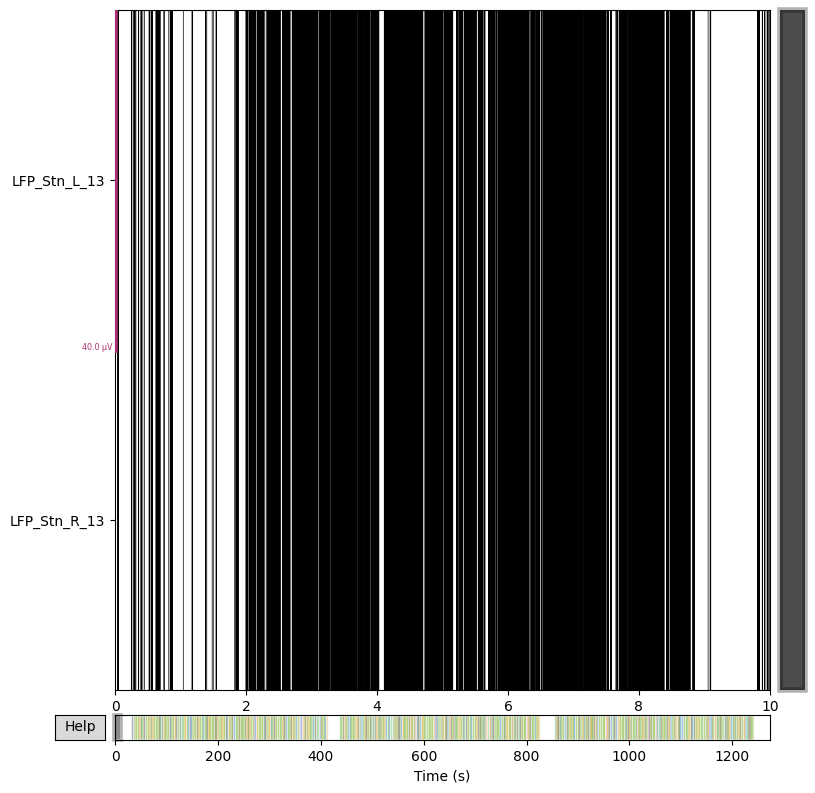

Channels marked as bad:
none


In [69]:
raw.plot()

In [72]:

### Plot PSD of signal (averaging all channels)
psd_raw_avg = raw.compute_psd(method="welch", picks=ch_names, fmin=0, fmax=120, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)/2), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD')


Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\2051556252.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD')


Text(0.5, 0.98, 'PSD')

In [80]:
from mne.io import read_raw_fieldtrip

In [123]:
#lfp_filepath_raw = "C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\DATA\\sub023\\raw_data\\JSON\\DBS OFF"
lfp_filepath_raw = "C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\DATA\\erna_test_JV"
file_name = os.path.join(lfp_filepath_raw, "sub-144_110hz_ses-Fu02mMedOff01_task-TASK10_acq-StimOnR_mod-BrainSenseBip_run-1.mat")
raw_data = read_raw_fieldtrip(
    file_name, info={}, data_name="data"
    )

c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\pymatreader\utils.py:238: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Creating RawArray with float64 data, n_channels=6, n_times=72563
    Range : 0 ... 72562 =      0.000 ...   290.248 secs
Ready.


C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\3960488459.py:4: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  raw_data = read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\3960488459.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13. Making it a MISC channel.
  raw_data = read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\3960488459.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_02. Making it a MISC channel.
  raw_data = read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\3960488459.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13_PEAK63Hz_THR20-30_AVG3000ms. Making it a MISC channel.
  raw_data = read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\3960488459.py:4: RuntimeWarning: Cannot guess the

In [125]:
raw_data.ch_names

['LFP_Stn_L_13',
 'LFP_Stn_R_02',
 'LFP_Stn_L_13_PEAK63Hz_THR20-30_AVG3000ms',
 'LFP_Stn_R_02_PEAK63Hz_THR20-30_AVG3000ms',
 'STIM_L_125Hz_60us',
 'STIM_R_125Hz_60us']

In [126]:
raw_data.drop_channels(['LFP_Stn_L_13_PEAK63Hz_THR20-30_AVG3000ms',
 'LFP_Stn_R_02_PEAK63Hz_THR20-30_AVG3000ms',
 'STIM_L_125Hz_60us',
 'STIM_R_125Hz_60us'])

<RawArray | 2 x 72563 (290.2 s), ~1.1 MB, data loaded>

In [127]:
ch_names = raw_data.ch_names
sf = raw_data.info['sfreq']

In [ ]:
### Plot PSD of signal (averaging all channels)
psd_raw_avg = raw_data.compute_psd(method="welch", picks=ch_names, fmin=0, fmax=120, 
                               n_fft=round(sf)*15, n_overlap=int(round(sf)/2), 
                               window="hamming")
psd_raw_avg.plot(picks = ch_names).suptitle('PSD')


Effective window size : 15.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Juliette\AppData\Local\Temp\ipykernel_26796\2417359446.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_raw_avg.plot(picks = ch_names).suptitle('PSD')


Text(0.5, 0.98, 'PSD')

c:\Users\Juliette\anaconda3\envs\ephy\lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  el.exec() if hasattr(el, "exec") else el.exec_()
